# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
import scipy.stats as stats

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
adultDataSet_filename = os.path.join(os.getcwd(), "data", "adultData.csv")
df = pd.read_csv(adultDataSet_filename, header=0)


df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
5,37.0,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K
6,49.0,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,<=50K
7,52.0,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,45.0,United-States,>50K
8,31.0,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,>50K
9,42.0,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,5178,0,40.0,United-States,>50K


In [4]:
df.shape

(32561, 15)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

# Preprocessing

# Replacing null values

**Numerical Variables - Replace w/ mean**

In [5]:
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64


In [6]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

In [7]:
mean_hours = df['hours-per-week'].mean()
df['hours-per-week'].fillna(value=mean_hours, inplace=True)
mean_age = df['age'].mean()
df['age'].fillna(value=mean_age, inplace=True)

In [8]:
workclass_mode = (df['workclass'].mode()).iloc[0]
occupation_mode = df['occupation'].mode().iloc[0]
nativecountry_mode = df['native-country'].mode().iloc[0]


In [9]:
df['workclass'].fillna(value=workclass_mode, inplace=True)
df['occupation'].fillna(value=occupation_mode, inplace=True)
df['native-country'].fillna(value=nativecountry_mode, inplace=True)

In [10]:
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex_selfID        0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_binary     0
dtype: int64


In [11]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


# One-Hot Encoding

Because my label of choice income_binary is either equal or above 50K pay, or less than 50K, I will be converting the strings into a boolean. True = >50k and False = <=50k

In [12]:
df['income_binary'] = df['income_binary'].replace(to_replace='<=50K', value=False)
df['income_binary']= df['income_binary'].replace(to_replace='>50K', value=True)


In [13]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary        bool
dtype: object

In [14]:
to_encode = df.select_dtypes(include=['object']).columns
to_encode

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex_selfID', 'native-country'],
      dtype='object')

In [15]:
df[to_encode].nunique()

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex_selfID         2
native-country    41
dtype: int64

There is a lot of values in Education, occupation, and native country to create unqiue one hot encoded columns, so we must truncate what we are working with.

In [16]:
##Workclass
top_10_WC = df['workclass'].value_counts()[:10].sort_values(ascending=False).index
top_10_WC

##education
top_10_E = df['education'].value_counts()[:10].sort_values(ascending=False).index
top_10_E

##occupation
top_10_O = df['occupation'].value_counts()[:10].sort_values(ascending=False).index
top_10_O

##native-country
top_10_NC = df['native-country'].value_counts()[:10].sort_values(ascending=False).index
top_10_NC

Index(['United-States', 'Mexico', 'Philippines', 'Germany', 'Canada',
       'Puerto-Rico', 'El-Salvador', 'India', 'Cuba', 'England'],
      dtype='object')

In [17]:
##Workclass
for val in top_10_WC :
    df["Workclass"+"_"+ val] = np.where((df['workclass'] == val), 1, 0)

##education
for val in top_10_E :
    df["Education"+"_"+ val] = np.where((df['education'] == val), 1, 0)


##occupation
for val in top_10_O :
    df["Occupation"+"_"+ val] = np.where((df['occupation'] == val), 1, 0)


##native-country
for val in top_10_NC :
    df["NativeCountry"+"_"+ val] = np.where((df['native-country'] == val), 1, 0)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,...,NativeCountry_United-States,NativeCountry_Mexico,NativeCountry_Philippines,NativeCountry_Germany,NativeCountry_Canada,NativeCountry_Puerto-Rico,NativeCountry_El-Salvador,NativeCountry_India,NativeCountry_Cuba,NativeCountry_England
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,...,1,0,0,0,0,0,0,0,0,0
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,...,1,0,0,0,0,0,0,0,0,0
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,...,1,0,0,0,0,0,0,0,0,0
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,...,1,0,0,0,0,0,0,0,0,0
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,1,0,0,0,0,0,0,0,0,0
32557,40.0,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Non-Female,...,1,0,0,0,0,0,0,0,0,0
32558,58.0,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,1,0,0,0,0,0,0,0,0,0
32559,22.0,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Non-Female,...,1,0,0,0,0,0,0,0,0,0


In [18]:
to_drop = ['workclass', 'education', 'occupation', 'native-country']
df = df.drop(columns = to_drop, axis=1)
to_encode = to_encode.drop(to_drop)

In [19]:
for name in to_encode:
    temp_df = pd.get_dummies(df[name])
    df.join(temp_df)

In [20]:
df.head()

,age,fnlwgt,education-num,marital-status,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,...,NativeCountry_United-States,NativeCountry_Mexico,NativeCountry_Philippines,NativeCountry_Germany,NativeCountry_Canada,NativeCountry_Puerto-Rico,NativeCountry_El-Salvador,NativeCountry_India,NativeCountry_Cuba,NativeCountry_England
0,39.0,77516,13,Never-married,Not-in-family,White,Non-Female,2174,0,40.0,...,1,0,0,0,0,0,0,0,0,0
1,50.0,83311,13,Married-civ-spouse,Husband,White,Non-Female,0,0,13.0,...,1,0,0,0,0,0,0,0,0,0
2,38.0,215646,9,Divorced,Not-in-family,White,Non-Female,0,0,40.0,...,1,0,0,0,0,0,0,0,0,0
3,53.0,234721,7,Married-civ-spouse,Husband,Black,Non-Female,0,0,40.0,...,1,0,0,0,0,0,0,0,0,0
4,28.0,338409,13,Married-civ-spouse,Wife,Black,Female,0,0,40.0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
df = df.drop(columns = to_encode, axis=1)


In [22]:
df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_binary', 'Workclass_Private',
       'Workclass_Self-emp-not-inc', 'Workclass_Local-gov',
       'Workclass_State-gov', 'Workclass_Self-emp-inc',
       'Workclass_Federal-gov', 'Workclass_Without-pay',
       'Workclass_Never-worked', 'Education_HS-grad', 'Education_Some-college',
       'Education_Bachelors', 'Education_Masters', 'Education_Assoc-voc',
       'Education_11th', 'Education_Assoc-acdm', 'Education_10th',
       'Education_7th-8th', 'Education_Prof-school',
       'Occupation_Prof-specialty', 'Occupation_Craft-repair',
       'Occupation_Exec-managerial', 'Occupation_Adm-clerical',
       'Occupation_Sales', 'Occupation_Other-service',
       'Occupation_Machine-op-inspct', 'Occupation_Transport-moving',
       'Occupation_Handlers-cleaners', 'Occupation_Farming-fishing',
       'NativeCountry_United-States', 'NativeCountry_Mexico',
       'NativeCountry_Philippines'

In [23]:
df.dtypes

age                             float64
fnlwgt                            int64
education-num                     int64
capital-gain                      int64
capital-loss                      int64
hours-per-week                  float64
income_binary                      bool
Workclass_Private                 int64
Workclass_Self-emp-not-inc        int64
Workclass_Local-gov               int64
Workclass_State-gov               int64
Workclass_Self-emp-inc            int64
Workclass_Federal-gov             int64
Workclass_Without-pay             int64
Workclass_Never-worked            int64
Education_HS-grad                 int64
Education_Some-college            int64
Education_Bachelors               int64
Education_Masters                 int64
Education_Assoc-voc               int64
Education_11th                    int64
Education_Assoc-acdm              int64
Education_10th                    int64
Education_7th-8th                 int64
Education_Prof-school             int64


Because I can only perform corroletion analysis on numerical data, I will be testing out the performs on different combinations of features based on intuition to direve the best feature set for a model. I will be dropping fnlwgt, captial gain,and captial loss to start by intuition. There may be inbalance due to race being a feature, so further analysis is required to see fi this could cause bias.

In [24]:
drop_col = ['fnlwgt', 'capital-gain', 'capital-loss']

In [25]:
df = df.drop(columns=drop_col, axis=1)

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [26]:
y = df['income_binary']
X = df.drop(columns='income_binary')

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Note that k=5 is specifying that we want the top 5 features
selector = SelectKBest(f_classif, k=7)
selector.fit(X, y)
filter = selector.get_support()
top_5_features = X.columns[filter]

print("Best 5 features:")
print(top_5_features)

Best 5 features:
Index(['age', 'education-num', 'hours-per-week', 'Education_Bachelors',
       'Education_Masters', 'Occupation_Exec-managerial',
       'Occupation_Other-service'],
      dtype='object')


This portion above willlbe used when we perform feature selection

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

# Finding Best Hyperparamters

In my stack, I will be stacking K nearest nieghbors, DTs, Log Reg, Random Forests, and GBDT models, and evaluating each individually to see if stacking is giving the best results, and if so which combinations of models will perform the best.

# KNN

Our goal is to find the optimal choice of hyperparameter $K$. 

In [29]:
num_examples = np.linspace(start = 2, stop = np.sqrt(len(X_train)), num=10)
num_examples = [int(x) for x in (num_examples)]
param_grid = {'n_neighbors' : num_examples}

param_grid

{'n_neighbors': [2, 18, 35, 51, 68, 84, 101, 117, 134, 150]}

In [30]:
print('Running Grid Search...')

model = KNeighborsClassifier()


grid = GridSearchCV(model, param_grid, cv=5)



grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [31]:
best_k = grid_search.best_estimator_.n_neighbors
best_k

134

# Decision Trees

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [33]:
def train_test_DT(X_train, X_test, y_train, y_test, leaf, depth, crit='entropy'):
    '''
    Fit a Decision Tree classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test set.
    Parameters:
        leaf := The minimum number of samples required to be at a leaf node 
        depth := The maximum depth of the tree
        crit := The function to be used to measure the quality of a split. Default: gini.
    '''
    
      # 1. Create the  Scikit-learn DecisionTreeClassifier model object below and assign to variable 'model'
     
    model = DecisionTreeClassifier(criterion = crit, max_depth = depth, min_samples_leaf = leaf)
  
    # 2. Fit the model to the training data below
    model.fit(X_train, y_train)

    
    # 3. Make predictions on the test data and assign the result to the variable 'class_label_predictions' below
    class_label_predictions = model.predict(X_test)
        
  
    # 4. Compute the accuracy and save the result to the variable 'acc_score' below
    acc_score = accuracy_score(y_test, class_label_predictions)
        
   
    
    return acc_score

## Train on Different Hyperparameter Values

In [34]:
def visualize_accuracy(hyperparam_range, acc):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    p = sns.lineplot(x=hyperparam_range, y=acc, marker='o', label = 'Full training set')
        
    plt.title('Test set accuracy of the model predictions, for ' + ','.join([str(h) for h in hyperparam_range]))
    ax.set_xlabel('Hyperparameter value')
    ax.set_ylabel('Accuracy')
    plt.show()

In [35]:
def train_multiple_trees(max_depth_range, leaf):
    
    accuracy_list = []

    for md in max_depth_range:
        score = train_test_DT(X_train, X_test, y_train, y_test, leaf, md)
        print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
        accuracy_list.append(float(score))
    return accuracy_list

Max Depth=8, accuracy score: 0.8019244549083837
Max Depth=32, accuracy score: 0.7578053024874604


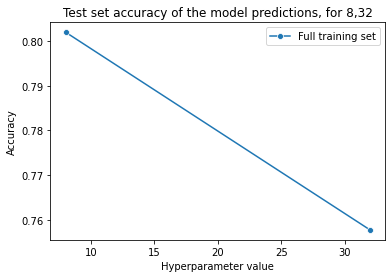

In [36]:
max_depth_range = [8, 32]
leaf = 1

acc = train_multiple_trees(max_depth_range, leaf)

visualize_accuracy(max_depth_range, acc)

Max Depth=1, accuracy score: 0.7583171256013922
Max Depth=2, accuracy score: 0.7908690756474562
Max Depth=4, accuracy score: 0.7984440577336472
Max Depth=8, accuracy score: 0.8016173610400246
Max Depth=16, accuracy score: 0.7833964581840516
Max Depth=32, accuracy score: 0.7555532807861604


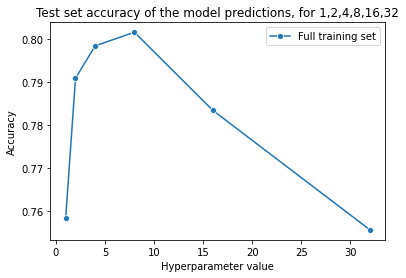

In [37]:
max_depth_range = [2**i for i in range(6)]
leaf = 1
acc = train_multiple_trees(max_depth_range, leaf)

visualize_accuracy(max_depth_range, acc)

Here, we see that a max depth of 8 yeilds the best accuracy

In [38]:
best_max_depth_dt = 8

## Logistic Regression

#### Using default C parameter to start

In [39]:
def train_test_LR(X_train, y_train, X_test, y_test, c=1):

    
    model = LogisticRegression(C= c)

  
    model.fit(X_train, y_train)

    
    
    probability_predictions = model.predict_proba(X_test)
  
    l_loss = log_loss(y_test, probability_predictions)
    print('Log loss: ' + str(l_loss))

        
        
    class_label_predictions = model.predict(X_test)

        
        
    acc_score = accuracy_score(y_test, class_label_predictions)

    
    return l_loss, acc_score

### Analyze Results

In [40]:
loss, acc = train_test_LR(X_train, y_train, X_test, y_test)
print('Log loss: ' + str(loss))
print('Accuracy: ' + str(acc))

Log loss: 0.43002147614374137
Log loss: 0.43002147614374137
Accuracy: 0.7974204115057836


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Train on Different Hyperparameter Values and Analyze the Results

In [41]:
cs = [10**i for i in range(-10,10)]
cs

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1,
 10,
 100,
 1000,
 10000,
 100000,
 1000000,
 10000000,
 100000000,
 1000000000]

In [42]:
ll_cs = list()
acc_cs = list()
for i in cs:
    x,y = train_test_LR(X_train, y_train, X_test, y_test, c=i)
    ll_cs.append(x)
    acc_cs.append(y)


Log loss: 0.5530084263747141
Log loss: 0.5529381045971586
Log loss: 0.5522432760909255
Log loss: 0.5459712370925307
Log loss: 0.5162585859155195
Log loss: 0.48178118887187277
Log loss: 0.44936031803943555


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Log loss: 0.4374973551790548


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Log loss: 0.4300836766079096


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Log loss: 0.42888847058431623


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Log loss: 0.43002147614374137


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Log loss: 0.4284498303296001


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Log loss: 0.42982760034422046


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Log loss: 0.4290169820776025


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Log loss: 0.42957984755447565


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Log loss: 0.42874803766188013


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Log loss: 0.4298759504927948


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Log loss: 0.42896508702461444


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Log loss: 0.429503656171272
Log loss: 0.4287920838548076


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Visualize and Evaluate

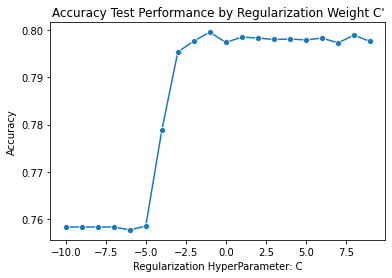

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.log10(cs)

sns.lineplot(x=x, y=acc_cs, marker='o')

plt.title("Accuracy Test Performance by Regularization Weight C'")
plt.xlabel("Regularization HyperParameter: C")
plt.ylabel("Accuracy")
plt.show()

A c value of 0.1 yields the best results

## Random Forest

In [44]:
grid_space={'max_depth':[3,5,10],
              'n_estimators':[10,100,200],
           }

In [45]:

from sklearn.model_selection import GridSearchCV


print('Running Grid Search...')
rf = RandomForestClassifier()


grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X_train,y_train)

print('Done')

Running Grid Search...
Done


In [46]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))
best_max_depth_rf = model_grid.best_estimator_.max_depth
best_max_depth_rf
best_estimators_rf = model_grid.best_estimator_.n_estimators
best_estimators_rf

Best hyperparameters are: {'max_depth': 10, 'n_estimators': 100}
Best score is: 0.8018605186151477


100

# Building All Models Individually

### KNN

In [48]:
def train_test_knn(X_train, X_test, y_train, y_test, best_k ):
    '''
    Fit a k Nearest Neighbors classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test data.
    '''
    
    model = KNeighborsClassifier(n_neighbors = best_k)
    model.fit(X_train, y_train)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    print(class_label_predictions)
    
    return acc_score


In [49]:
train_test_knn(X_train, X_test, y_train, y_test, best_k)

[False False False ... False False False]


0.8014126317944519

### DTs

In [50]:
    model = DecisionTreeClassifier( max_depth = best_max_depth_dt, min_samples_leaf = leaf)
  
    # 2. Fit the model to the training data below
    model.fit(X_train, y_train)

    
    # 3. Make predictions on the test data and assign the result to the variable 'class_label_predictions' below
    class_label_predictions = model.predict(X_test)
        
  
    # 4. Compute the accuracy and save the result to the variable 'acc_score' below
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    acc_score

0.7982393284880746

### Logistic Reg

In [51]:
    model = LogisticRegression(C= 0.1)

  
    # 2. Fit the model to the training data below
    model.fit(X_train, y_train)

    
    
    # 3. Make predictions on the test data using the predict_proba() method and assign the result to the 
    # variable 'probability_predictions' below
    probability_predictions = model.predict_proba(X_test)
  
    # 4. Compute the log loss on 'probability_predictions' and save the result to the variable 'l_loss' below
    l_loss = log_loss(y_test, probability_predictions)
    print('Log loss: ' + str(l_loss))

        
        
    # 5. Make predictions on the test data using the predict() method and assign the result to the 
    # variable 'class_label_predictions' below
    class_label_predictions = model.predict(X_test)

        
        
    # 6. Compute the accuracy score on 'class_label_predictions' and save the result to the variable 'acc_score' below
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    print(acc_score)
    print(l_loss)

Log loss: 0.42888847058431623
0.7995700685842972
0.42888847058431623


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Random Forest

In [52]:
print('Begin Random Forest Implementation...')
rf_model = RandomForestClassifier(max_depth = best_max_depth_rf, criterion = 'entropy', n_estimators= best_estimators_rf)


rf_model.fit(X_train, y_train)
rf_predictions = list(rf_model.predict_proba(X_test)[:,1])
class_label_predictions = rf_model.predict(X_test)
acc_score = accuracy_score(y_test, class_label_predictions)

print(acc_score)
print('End')

Begin Random Forest Implementation...
0.8066332275565564
End


# Stacking

In [53]:
from sklearn.ensemble import StackingClassifier

In [54]:
estimators = [("DT", DecisionTreeClassifier(max_depth = best_max_depth_dt)),
              ("RF", RandomForestClassifier(max_depth = best_max_depth_rf, criterion = 'entropy', n_estimators= best_estimators_rf)),
              
              ("LR", LogisticRegression(C=0.1, max_iter=1000)),
              ("KNN", KNeighborsClassifier(n_neighbors = best_k))
             ]

In [55]:
stacking_model = StackingClassifier(estimators = estimators, cv = 5, passthrough=False)

In [56]:
print('Implement Stacking...')

stacking_best_model = StackingClassifier(estimators = estimators, passthrough=False)
stacking_best_model.fit(X_train,y_train)
print('End')

Implement Stacking...
End


In [57]:
proba_predictions_default = stacking_best_model.predict_proba(X_test)[:,1]
class_label_predictions_default = stacking_best_model.predict(X_test)

In [65]:
acc_score = accuracy_score(class_label_predictions_default , y_test)
print('Accuracy score: ' + str(acc_score))
con = confusion_matrix(y_test, class_label_predictions_default)
pd.DataFrame(con,  index=['Binary Income <=50K', 'Binary Income >50K'], columns=['Binary Income <=50K', 'Binary Income >50K'])

Accuracy score: 0.8111372709591566


,Binary Income <=50K,Binary Income >50K
Binary Income <=50K,6945,463
Binary Income >50K,1382,979


In [66]:
from sklearn.metrics import precision_recall_curve

In [67]:
precision_default, recall_default, thresholds_default = precision_recall_curve(y_test, proba_predictions_default)

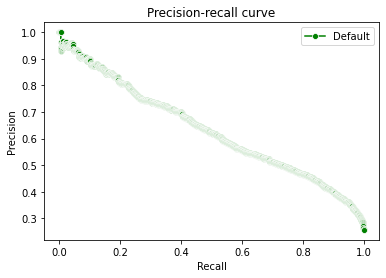

In [68]:
###default
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=recall_default, y=precision_default, marker = 'o', color = "green", label ="Default")

plt.title("Precision-recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

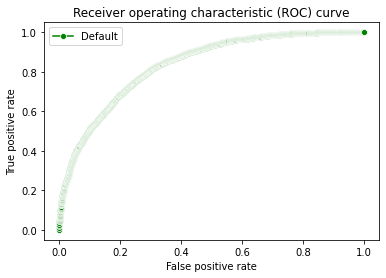

In [69]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr_default, tpr_default, thresholds_default = roc_curve(y_test, proba_predictions_default)
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=fpr_default, y=tpr_default, marker = 'o', label = "Default", color = "green")

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()

In [70]:
auc_default = auc(fpr_default, tpr_default)

print(auc_default)

0.8365333664031147


# Feature Selection


In [81]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [92]:
# Create new training atnd test data for features
new_X_train = X_train[top_5_features]
new_X_test = X_test[top_5_features]

At this point, I went back and replaced my original test and train data with the concatanated dat sets

In [93]:
print('Implement Stacking...')

stacking_best_model = StackingClassifier(estimators = estimators, passthrough=False)
stacking_best_model.fit(new_X_train, y_train)
print('End')

Implement Stacking...
End


In [94]:
proba_predictions_default = stacking_best_model.predict_proba(new_X_test)[:,1]
class_label_predictions_default = stacking_best_model.predict(new_X_test)

In [95]:
acc_score = accuracy_score(class_label_predictions_default , y_test)
print('Accuracy score: ' + str(acc_score))
con = confusion_matrix(y_test, class_label_predictions_default)
pd.DataFrame(con,  index=['Binary Income <=50K', 'Binary Income >50K'], columns=['Binary Income <=50K', 'Binary Income >50K'])

Accuracy score: 0.8079639676527792


,Binary Income <=50K,Binary Income >50K
Binary Income <=50K,6947,461
Binary Income >50K,1415,946


The accuracy went down when we removed feature, and this could be because other features were about topick up nuances in the data. Therefore, it is best to keep in the originial features and not limit the extense of our data set

### Evaluate and Visualize

In [96]:
precision_default, recall_default, thresholds_default = precision_recall_curve(y_test, proba_predictions_default)

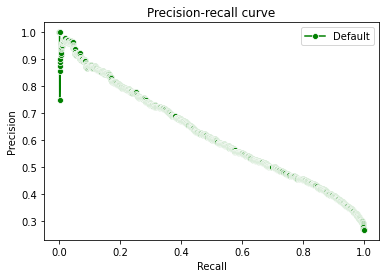

In [97]:
###default
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=recall_default, y=precision_default, marker = 'o', color = "green", label ="Default")

plt.title("Precision-recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [99]:
auc_default = auc(fpr_default, tpr_default)

print(auc_default)

0.836238459881278


# Model Tuning (Which models should remain in the stack?)

Out of all the models, the DT performs not as great as the others and could risk the performance of the stack.

In [100]:
estimators_1 = [
              ("RF", RandomForestClassifier(max_depth = best_max_depth_rf, criterion = 'entropy', n_estimators= best_estimators_rf)),
              
              ("LR", LogisticRegression(C=0.1, max_iter=1000)),
              ("KNN", KNeighborsClassifier(n_neighbors = best_k))
             ]

In [101]:
print('Implement Stacking...')

stacking_best_model = StackingClassifier(estimators = estimators_1, passthrough=False)
stacking_best_model.fit(X_train,y_train)
print('End')

Implement Stacking...
End


In [102]:
proba_predictions_default = stacking_best_model.predict_proba(X_test)[:,1]
class_label_predictions_default = stacking_best_model.predict(X_test)

In [103]:
acc_score = accuracy_score(class_label_predictions_default , y_test)
print('Accuracy score: ' + str(acc_score))
con = confusion_matrix(y_test, class_label_predictions_default)
pd.DataFrame(con,  index=['Binary Income <=50K', 'Binary Income >50K'], columns=['Binary Income <=50K', 'Binary Income >50K'])

Accuracy score: 0.8117514586958747


,Binary Income <=50K,Binary Income >50K
Binary Income <=50K,6958,450
Binary Income >50K,1389,972


### Evaluate and Visualize

In [104]:
precision_default, recall_default, thresholds_default = precision_recall_curve(y_test, proba_predictions_default)

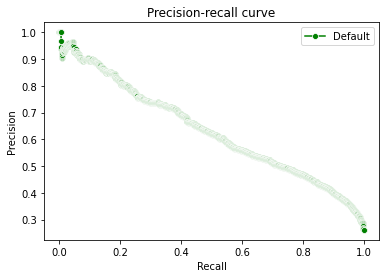

In [105]:
###default
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=recall_default, y=precision_default, marker = 'o', color = "green", label ="Default")

plt.title("Precision-recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

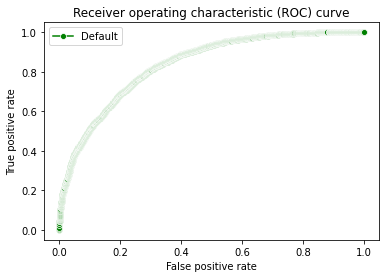

In [106]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr_default, tpr_default, thresholds_default = roc_curve(y_test, proba_predictions_default)
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=fpr_default, y=tpr_default, marker = 'o', label = "Default", color = "green")

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.show()

In [107]:
auc_default = auc(fpr_default, tpr_default)

print(auc_default)

0.8370524544821676


The auc scores improved after taking out the DT model, and the accuracy score also slightly improved.